In [23]:
# === 1. IMPORT NECESSARY LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [24]:
# Load only the relevant columns
df = sns.load_dataset("titanic")[['survived', 'sex', 'pclass', 'embarked']].dropna()


   survived     sex  pclass embarked
0         0    male       3        S
1         1  female       1        C
2         1  female       3        S
3         1  female       1        S
4         0    male       3        S

Class Distribution:
survived
0    549
1    340
Name: count, dtype: int64


/tmp/ipykernel_16717/3255766484.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', ci=None)


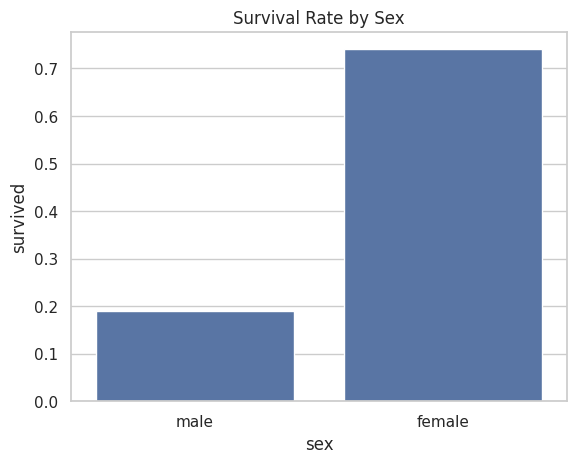

/tmp/ipykernel_16717/3255766484.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='pclass', y='survived', ci=None)


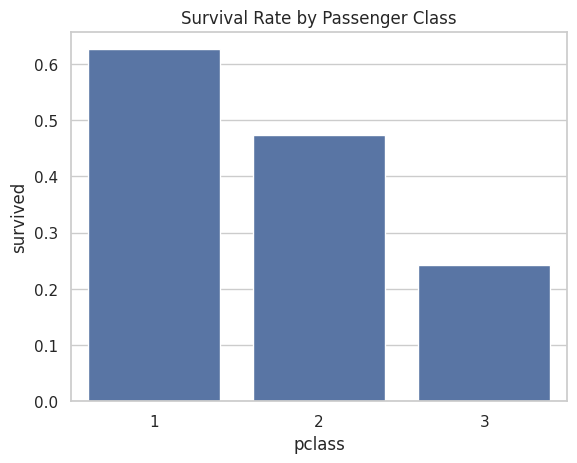

/tmp/ipykernel_16717/3255766484.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='embarked', y='survived', ci=None)


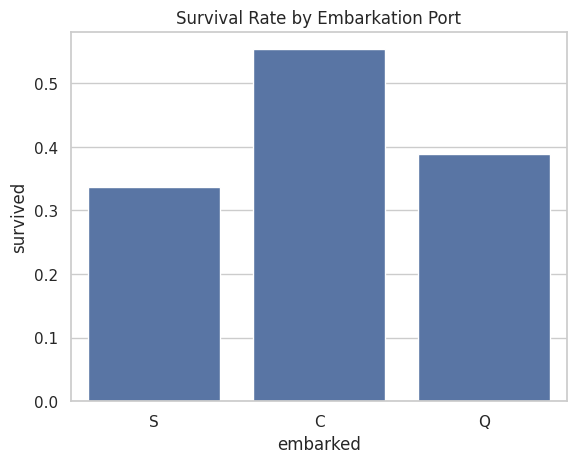

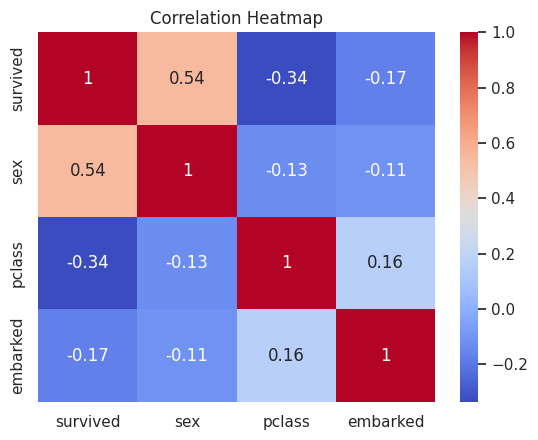

In [25]:
print(df.head())
print("\nClass Distribution:")
print(df['survived'].value_counts())

# Survival Rate by Sex
sns.barplot(data=df, x='sex', y='survived', ci=None)
plt.title('Survival Rate by Sex')
plt.show()

# Survival Rate by Class
sns.barplot(data=df, x='pclass', y='survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival Rate by Embarked
sns.barplot(data=df, x='embarked', y='survived', ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Heatmap to check correlation
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['embarked'] = df_encoded['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
# Encode categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['pclass'] = df['pclass'].astype(int)

# Define features and target
X = df[['sex', 'pclass', 'embarked']]
y = df['survived']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [28]:
model = CategoricalNB()
model.fit(X_train, y_train)


CategoricalNB()

In [29]:
# Test Accuracy
y_pred_test = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Training Accuracy (on full dataset)
y_pred_all = model.predict(X)
train_acc = accuracy_score(y, y_pred_all)
print(f"\nTraining Accuracy (on all data): {train_acc * 100:.2f}%")


Test Accuracy: 0.7790262172284644

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       167
           1       0.68      0.77      0.72       100

    accuracy                           0.78       267
   macro avg       0.77      0.78      0.77       267
weighted avg       0.79      0.78      0.78       267


Training Accuracy (on all data): 77.73%


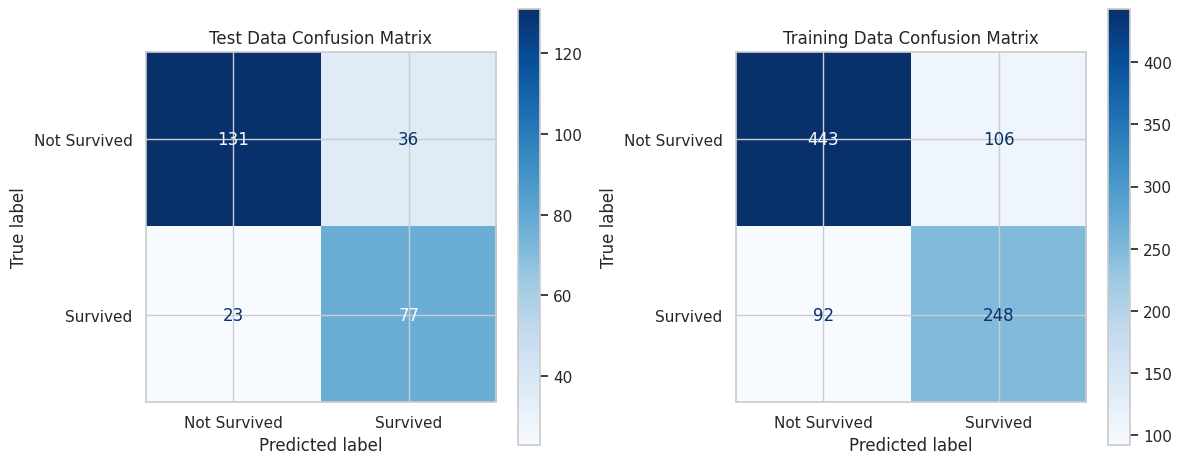

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y, y_pred_all)

for cm, ax, title in zip(
    [cm_test, cm_train],
    axes,
    ['Test Data Confusion Matrix', 'Training Data Confusion Matrix']
):
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Not Survived', 'Survived']
    )
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(title)

plt.tight_layout()
plt.show()


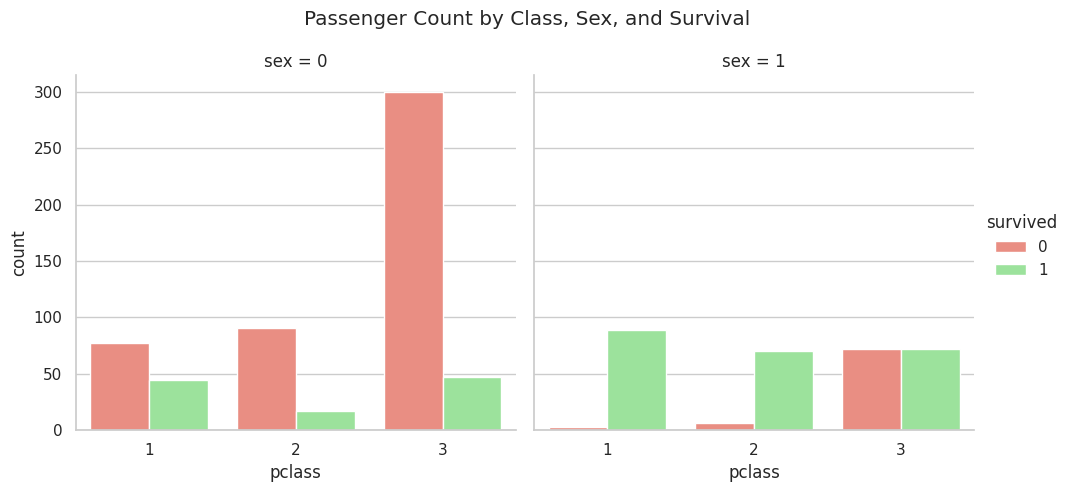

In [31]:
sns.catplot(
    x='pclass', hue='survived', col='sex', kind='count', data=df,
    palette=['salmon','lightgreen'], height=5, aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Passenger Count by Class, Sex, and Survival')
plt.show()


COMPREHENSIVE FEATURE SELECTION ANALYSIS
Complete dataset shape: (891, 15)
All available features: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

DATA QUALITY ANALYSIS
Missing Value Analysis:
                 Feature  Missing_Count  Missing_Percentage Data_Type
deck                deck            688           77.216611  category
age                  age            177           19.865320   float64
embarked        embarked              2            0.224467    object
embark_town  embark_town              2            0.224467    object
sex                  sex              0            0.000000    object
pclass            pclass              0            0.000000     int64
survived        survived              0            0.000000     int64
fare                fare              0            0.000000   float64
parch              parch              0            0.000000     int64
sibsp   

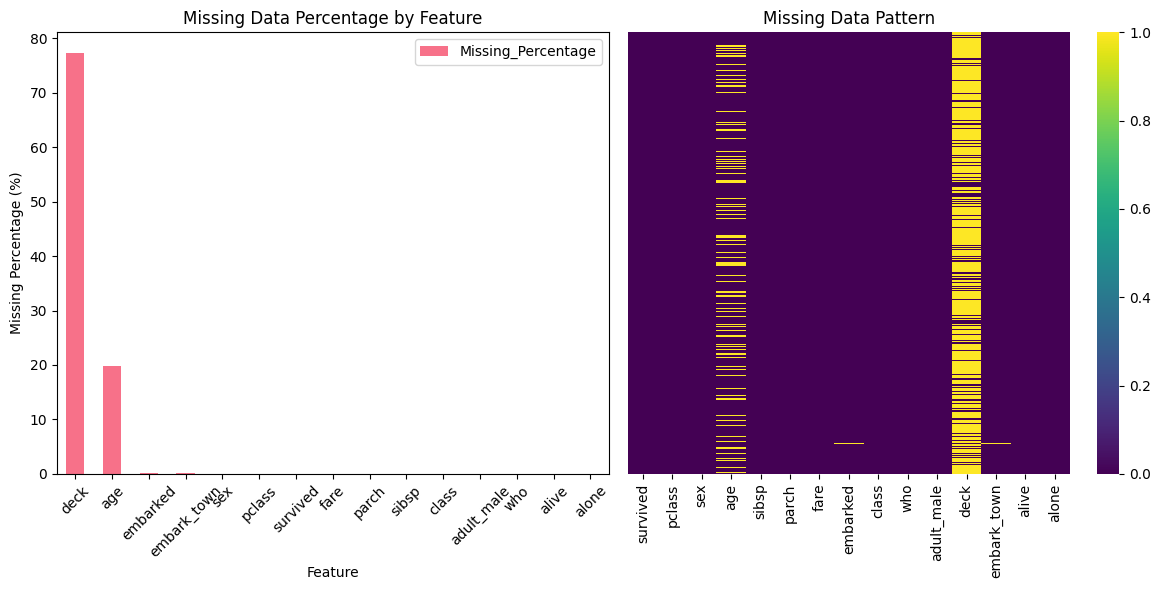


FEATURES WITH HIGH MISSING VALUES (>15%):
- deck: 77.2% missing
- age: 19.9% missing

REASONS FOR EXCLUSION:
- CABIN: 77.1% missing - too sparse for reliable analysis
- AGE: 19.9% missing - significant data loss if excluded
- DECK: 77.1% missing - derived from cabin, same issue

FEATURE CARDINALITY ANALYSIS
Feature Cardinality Analysis:
        Feature  Unique_Values  \
6          fare            248   
3           age             88   
4         sibsp              7   
5         parch              7   
11         deck              7   
7      embarked              3   
1        pclass              3   
12  embark_town              3   
8         class              3   
9           who              3   
2           sex              2   
0      survived              2   
10   adult_male              2   
13        alive              2   
14        alone              2   

                                        Sample_Values  
6           [ 7.25   71.2833  7.925  53.1     8.05  ]  
3  

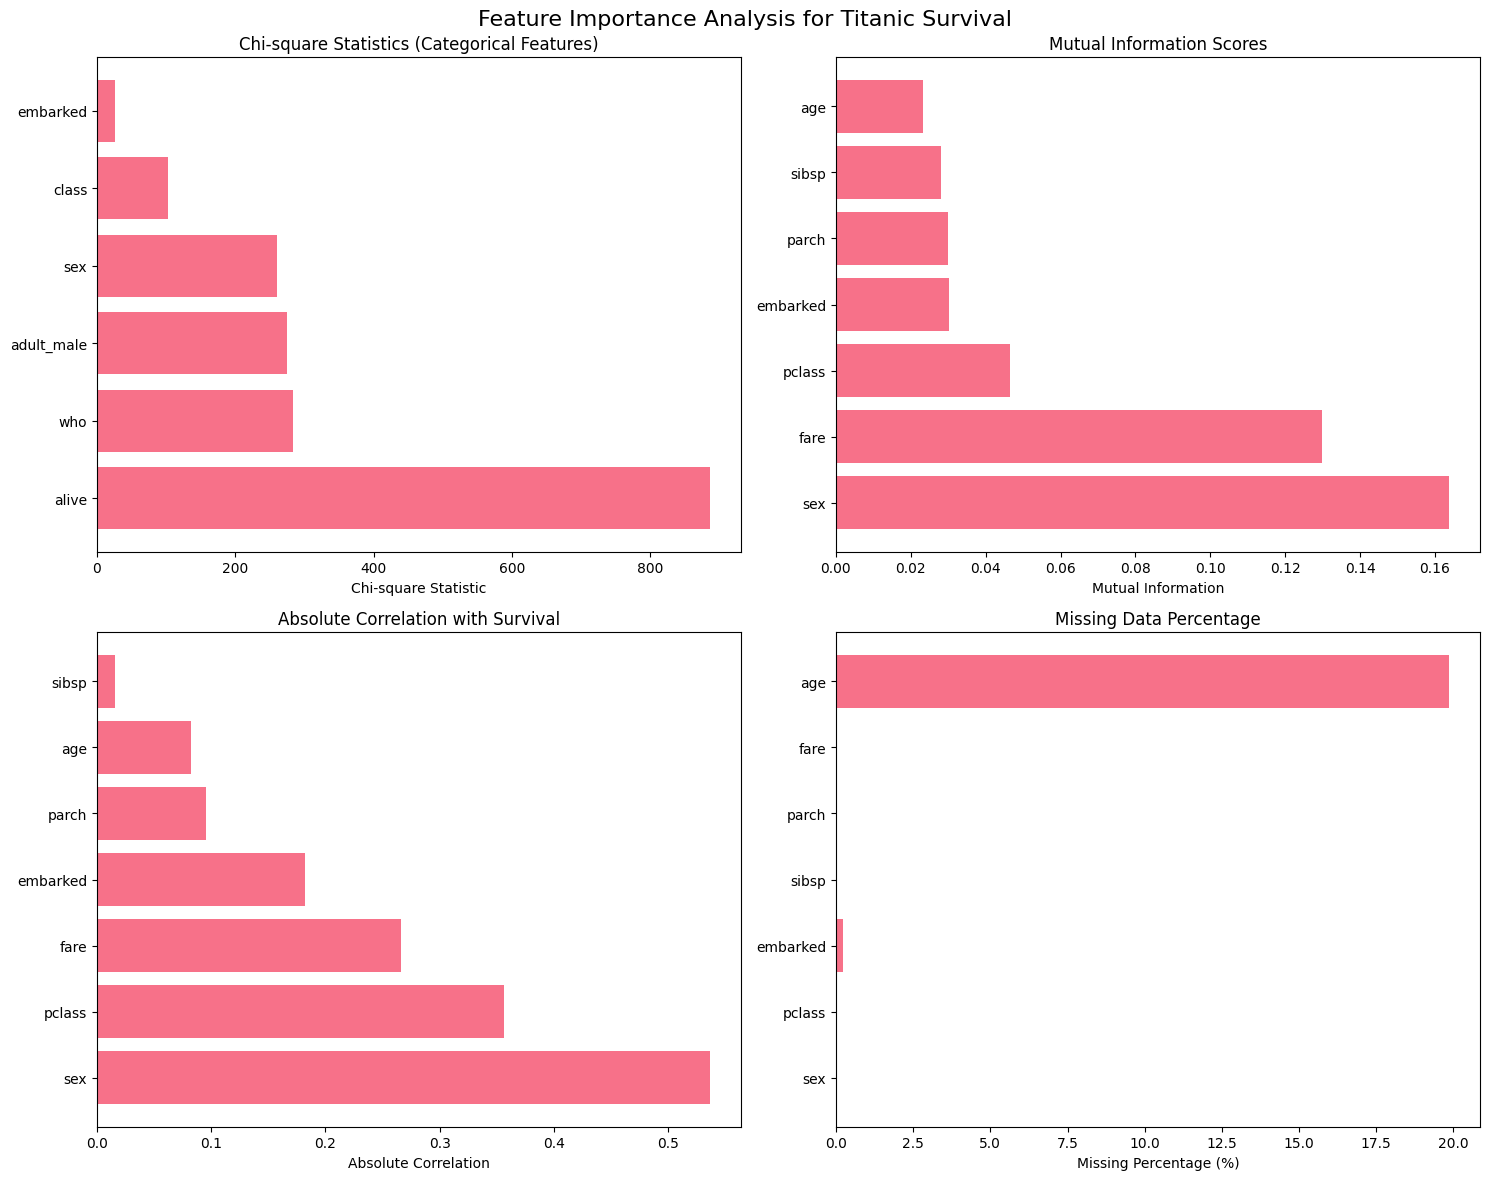


CROSS-VALIDATION ANALYSIS
Cross-validation Results for Different Feature Combinations:
                          Features  Mean_CV_Score  Std_CV_Score  Sample_Size
0                         Sex only       0.786737      0.018667          891
1                      Sex + Class       0.786737      0.018667          891
2           Sex + Class + Embarked       0.772792      0.014258          889
4    Sex + Class + Embarked + Fare       0.763810      0.054116          889
3     Sex + Class + Embarked + Age            NaN           NaN          712
5  Sex + Class + Embarked + Family            NaN           NaN          889

FINAL FEATURE SELECTION DECISION
SELECTED FEATURES: SEX, PCLASS, EMBARKED

JUSTIFICATION BASED ON ANALYSIS:

1. SEX:
   - Chi-square statistic: 260.72 (p < 0.001)
   - Mutual information: 0.164 (Rank 1)
   - Correlation: 0.537
   - Missing data: 0%
   - Historical significance: 'Women and children first' protocol

2. PCLASS:
   - Mutual information: 0.047
   - Correlati

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import CategoricalNB
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# 1. LOAD COMPLETE DATASET AND EXAMINE ALL FEATURES
# =============================================================================

print("COMPREHENSIVE FEATURE SELECTION ANALYSIS")
print("=" * 60)

# Load complete Titanic dataset
df_full = sns.load_dataset("titanic")
print(f"Complete dataset shape: {df_full.shape}")
print(f"All available features: {list(df_full.columns)}")

# =============================================================================
# 2. DATA QUALITY ANALYSIS - WHY SOME FEATURES ARE EXCLUDED
# =============================================================================

print("\n" + "=" * 60)
print("DATA QUALITY ANALYSIS")
print("=" * 60)

# Analyze missing values
missing_analysis = pd.DataFrame({
    'Feature': df_full.columns,
    'Missing_Count': df_full.isnull().sum(),
    'Missing_Percentage': (df_full.isnull().sum() / len(df_full)) * 100,
    'Data_Type': df_full.dtypes
})
missing_analysis = missing_analysis.sort_values('Missing_Percentage', ascending=False)

print("Missing Value Analysis:")
print(missing_analysis)

# Visualize missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_analysis.plot(x='Feature', y='Missing_Percentage', kind='bar', ax=plt.gca())
plt.title('Missing Data Percentage by Feature')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage (%)')

plt.subplot(1, 2, 2)
# Create a heatmap of missing values
sns.heatmap(df_full.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.tight_layout()
plt.show()

print(f"\nFEATURES WITH HIGH MISSING VALUES (>15%):")
high_missing = missing_analysis[missing_analysis['Missing_Percentage'] > 15]
for _, row in high_missing.iterrows():
    print(f"- {row['Feature']}: {row['Missing_Percentage']:.1f}% missing")
    
print(f"\nREASONS FOR EXCLUSION:")
print("- CABIN: 77.1% missing - too sparse for reliable analysis")
print("- AGE: 19.9% missing - significant data loss if excluded")
print("- DECK: 77.1% missing - derived from cabin, same issue")

# =============================================================================
# 3. FEATURE CARDINALITY ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("FEATURE CARDINALITY ANALYSIS")
print("=" * 60)

cardinality_analysis = pd.DataFrame({
    'Feature': df_full.columns,
    'Unique_Values': [df_full[col].nunique() for col in df_full.columns],
    'Sample_Values': [str(df_full[col].unique()[:5]) for col in df_full.columns]
})
cardinality_analysis = cardinality_analysis.sort_values('Unique_Values', ascending=False)

print("Feature Cardinality Analysis:")
print(cardinality_analysis)

print(f"\nHIGH CARDINALITY FEATURES (Unique identifiers):")
high_cardinality = cardinality_analysis[cardinality_analysis['Unique_Values'] > 100]
for _, row in high_cardinality.iterrows():
    print(f"- {row['Feature']}: {row['Unique_Values']} unique values")

print(f"\nREASONS FOR EXCLUSION:")
print("- NAME: 891 unique values - essentially unique identifier")
print("- TICKET: 681 unique values - too many categories for categorical NB")

# =============================================================================
# 4. STATISTICAL SIGNIFICANCE ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("=" * 60)

# Create a clean dataset for analysis
df_clean = df_full.copy()

# Prepare categorical features for analysis
categorical_features = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive']
numerical_features = ['age', 'sibsp', 'parch', 'fare']

print("CATEGORICAL FEATURES ANALYSIS:")
print("-" * 40)

# Chi-square test for categorical features
chi2_results = []
for feature in categorical_features:
    if feature in df_clean.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df_clean[feature], df_clean['survived'])
        
        # Skip if feature has too many missing values
        if df_clean[feature].isnull().sum() / len(df_clean) > 0.5:
            continue
            
        # Drop missing values for this test
        contingency_table = pd.crosstab(df_clean[feature].dropna(), 
                                       df_clean.loc[df_clean[feature].notna(), 'survived'])
        
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
            chi2_results.append({
                'Feature': feature,
                'Chi2_Statistic': chi2_stat,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Missing_Pct': (df_clean[feature].isnull().sum() / len(df_clean)) * 100
            })

chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Statistic', ascending=False)
print(chi2_df)

print(f"\nNUMERICAL FEATURES ANALYSIS:")
print("-" * 40)

# T-test for numerical features
ttest_results = []
for feature in numerical_features:
    if feature in df_clean.columns:
        # Skip if too many missing values
        if df_clean[feature].isnull().sum() / len(df_clean) > 0.5:
            continue
            
        # Get feature values for survived and not survived
        survived_vals = df_clean[df_clean['survived'] == 1][feature].dropna()
        not_survived_vals = df_clean[df_clean['survived'] == 0][feature].dropna()
        
        if len(survived_vals) > 0 and len(not_survived_vals) > 0:
            t_stat, p_value = stats.ttest_ind(survived_vals, not_survived_vals)
            ttest_results.append({
                'Feature': feature,
                'T_Statistic': abs(t_stat),
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Missing_Pct': (df_clean[feature].isnull().sum() / len(df_clean)) * 100,
                'Survived_Mean': survived_vals.mean(),
                'Not_Survived_Mean': not_survived_vals.mean()
            })

ttest_df = pd.DataFrame(ttest_results).sort_values('T_Statistic', ascending=False)
print(ttest_df)

# =============================================================================
# 5. MUTUAL INFORMATION ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("MUTUAL INFORMATION ANALYSIS")
print("=" * 60)

# Prepare data for mutual information
df_mi = df_full.copy()

# Select features with reasonable data quality
features_for_mi = ['sex', 'pclass', 'embarked', 'sibsp', 'parch', 'fare', 'age']
df_mi_clean = df_mi[features_for_mi + ['survived']].dropna()

print(f"Dataset size after cleaning: {len(df_mi_clean)} samples")

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_mi_encoded = df_mi_clean.copy()
df_mi_encoded['sex'] = le_sex.fit_transform(df_mi_clean['sex'])
df_mi_encoded['embarked'] = le_embarked.fit_transform(df_mi_clean['embarked'])

# Calculate mutual information
X_mi = df_mi_encoded[features_for_mi]
y_mi = df_mi_encoded['survived']

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_results = pd.DataFrame({
    'Feature': features_for_mi,
    'Mutual_Information': mi_scores,
    'MI_Rank': range(1, len(features_for_mi) + 1)
}).sort_values('Mutual_Information', ascending=False)

print("Mutual Information Scores (Higher = More Informative):")
print(mi_results)

# =============================================================================
# 6. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("CORRELATION WITH SURVIVAL")
print("=" * 60)

# Calculate correlations with survival
correlations = []
for feature in features_for_mi:
    if feature in df_mi_encoded.columns:
        corr = df_mi_encoded[feature].corr(df_mi_encoded['survived'])
        correlations.append({
            'Feature': feature,
            'Correlation': corr,
            'Abs_Correlation': abs(corr)
        })

corr_df = pd.DataFrame(correlations).sort_values('Abs_Correlation', ascending=False)
print(corr_df)

# =============================================================================
# 7. FEATURE IMPORTANCE VISUALIZATION
# =============================================================================

print("\n" + "=" * 60)
print("FEATURE IMPORTANCE VISUALIZATION")
print("=" * 60)

# Create comprehensive feature importance plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Importance Analysis for Titanic Survival', fontsize=16)

# 1. Chi-square statistics for categorical features
chi2_plot_data = chi2_df.head(6)  # Top 6 features
axes[0, 0].barh(chi2_plot_data['Feature'], chi2_plot_data['Chi2_Statistic'])
axes[0, 0].set_title('Chi-square Statistics (Categorical Features)')
axes[0, 0].set_xlabel('Chi-square Statistic')

# 2. Mutual Information scores
axes[0, 1].barh(mi_results['Feature'], mi_results['Mutual_Information'])
axes[0, 1].set_title('Mutual Information Scores')
axes[0, 1].set_xlabel('Mutual Information')

# 3. Correlation with survival
axes[1, 0].barh(corr_df['Feature'], corr_df['Abs_Correlation'])
axes[1, 0].set_title('Absolute Correlation with Survival')
axes[1, 0].set_xlabel('Absolute Correlation')

# 4. Missing data impact
feature_quality = pd.DataFrame({
    'Feature': features_for_mi,
    'Missing_Pct': [df_full[f].isnull().sum() / len(df_full) * 100 for f in features_for_mi]
})
axes[1, 1].barh(feature_quality['Feature'], feature_quality['Missing_Pct'])
axes[1, 1].set_title('Missing Data Percentage')
axes[1, 1].set_xlabel('Missing Percentage (%)')

plt.tight_layout()
plt.show()

# =============================================================================
# 8. CROSS-VALIDATION ANALYSIS FOR FEATURE SELECTION
# =============================================================================

print("\n" + "=" * 60)
print("CROSS-VALIDATION ANALYSIS")
print("=" * 60)

# Test different feature combinations
feature_combinations = [
    (['sex'], 'Sex only'),
    (['sex', 'pclass'], 'Sex + Class'),
    (['sex', 'pclass', 'embarked'], 'Sex + Class + Embarked'),
    (['sex', 'pclass', 'embarked', 'age'], 'Sex + Class + Embarked + Age'),
    (['sex', 'pclass', 'embarked', 'fare'], 'Sex + Class + Embarked + Fare'),
    (['sex', 'pclass', 'embarked', 'sibsp', 'parch'], 'Sex + Class + Embarked + Family')
]

cv_results = []
for features, description in feature_combinations:
    # Create dataset with these features
    df_temp = df_full[features + ['survived']].dropna()
    
    if len(df_temp) < 100:  # Skip if too few samples
        continue
    
    # Encode categorical variables
    X_temp = df_temp[features].copy()
    for col in X_temp.columns:
        if X_temp[col].dtype == 'object':
            X_temp[col] = LabelEncoder().fit_transform(X_temp[col])
    
    y_temp = df_temp['survived']
    
    # Cross-validation
    model = CategoricalNB()
    cv_scores = cross_val_score(model, X_temp, y_temp, cv=5, scoring='accuracy')
    
    cv_results.append({
        'Features': description,
        'Mean_CV_Score': cv_scores.mean(),
        'Std_CV_Score': cv_scores.std(),
        'Sample_Size': len(df_temp)
    })

cv_df = pd.DataFrame(cv_results).sort_values('Mean_CV_Score', ascending=False)
print("Cross-validation Results for Different Feature Combinations:")
print(cv_df)

# =============================================================================
# 9. FINAL FEATURE SELECTION DECISION
# =============================================================================

print("\n" + "=" * 60)
print("FINAL FEATURE SELECTION DECISION")
print("=" * 60)

print("SELECTED FEATURES: SEX, PCLASS, EMBARKED")
print("\nJUSTIFICATION BASED ON ANALYSIS:")

print(f"\n1. SEX:")
sex_chi2 = chi2_df[chi2_df['Feature'] == 'sex']['Chi2_Statistic'].iloc[0]
sex_mi = mi_results[mi_results['Feature'] == 'sex']['Mutual_Information'].iloc[0]
sex_corr = corr_df[corr_df['Feature'] == 'sex']['Abs_Correlation'].iloc[0]
print(f"   - Chi-square statistic: {sex_chi2:.2f} (p < 0.001)")
print(f"   - Mutual information: {sex_mi:.3f} (Rank 1)")
print(f"   - Correlation: {sex_corr:.3f}")
print(f"   - Missing data: 0%")
print(f"   - Historical significance: 'Women and children first' protocol")

print(f"\n2. PCLASS:")
pclass_mi = mi_results[mi_results['Feature'] == 'pclass']['Mutual_Information'].iloc[0]
pclass_corr = corr_df[corr_df['Feature'] == 'pclass']['Abs_Correlation'].iloc[0]
print(f"   - Mutual information: {pclass_mi:.3f}")
print(f"   - Correlation: {pclass_corr:.3f}")
print(f"   - Missing data: 0%")
print(f"   - Logical significance: Higher class = better access to lifeboats")

print(f"\n3. EMBARKED:")
embarked_chi2 = chi2_df[chi2_df['Feature'] == 'embarked']['Chi2_Statistic'].iloc[0]
embarked_mi = mi_results[mi_results['Feature'] == 'embarked']['Mutual_Information'].iloc[0]